In [2]:
import pandas as pd

# Load CSV files
customers = pd.read_csv('customer.csv')
product_catalog = pd.read_csv('productcatalog.csv')
product_category = pd.read_csv('productcategory.csv')
sales = pd.read_csv('sales.csv')


C:\Users\kshet\AppData\Local\Temp\ipykernel_2400\1066185950.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv('customer.csv')


In [3]:
sales_customers = pd.merge(sales, customers, on='customer_id', how='inner')

In [4]:
sales_customers_products = pd.merge(sales_customers, product_catalog, on='product_id', how='inner')

In [5]:
final_sales_data = pd.merge(sales_customers_products, product_category, on='product_id', how='inner')

In [6]:
print(final_sales_data.head())

                      _id_x               customer_id  \
0  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
1  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
2  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
3  5e1067a612124100012b3c80  5e103fea121241000126d997   
4  5e1067a612124100012b3c80  5e103fea121241000126d997   

                 product_id  quantity       purchased_date_time  \
0  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
1  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
2  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
3  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   
4  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   

                      _id_y         dob gender city  \
0  5e1024dd1212410001218ff2         NaN    NaN  NaN   
1  5e1024dd1212410001218ff2         NaN    NaN  NaN   
2  5e1024dd1212410001218ff2         NaN    NaN  NaN   
3  5e103fea121241000126d997  1988-

In [7]:
# Drop the 'city' column
final_sales_data = final_sales_data.drop(columns=['city'])

# Save the updated table as a CSV file
final_sales_data.to_csv('combined_sales_data.csv', index=False)

# Verify the saved table
print(final_sales_data.head())


                      _id_x               customer_id  \
0  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
1  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
2  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
3  5e1067a612124100012b3c80  5e103fea121241000126d997   
4  5e1067a612124100012b3c80  5e103fea121241000126d997   

                 product_id  quantity       purchased_date_time  \
0  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
1  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
2  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
3  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   
4  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   

                      _id_y         dob gender  \
0  5e1024dd1212410001218ff2         NaN    NaN   
1  5e1024dd1212410001218ff2         NaN    NaN   
2  5e1024dd1212410001218ff2         NaN    NaN   
3  5e103fea121241000126d997  1988-10-07      M   
4  5

C:\Users\kshet\AppData\Local\Temp\ipykernel_2400\3568897643.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  final_sales_data['year_month'] = final_sales_data['purchased_date_time'].dt.to_period('M')


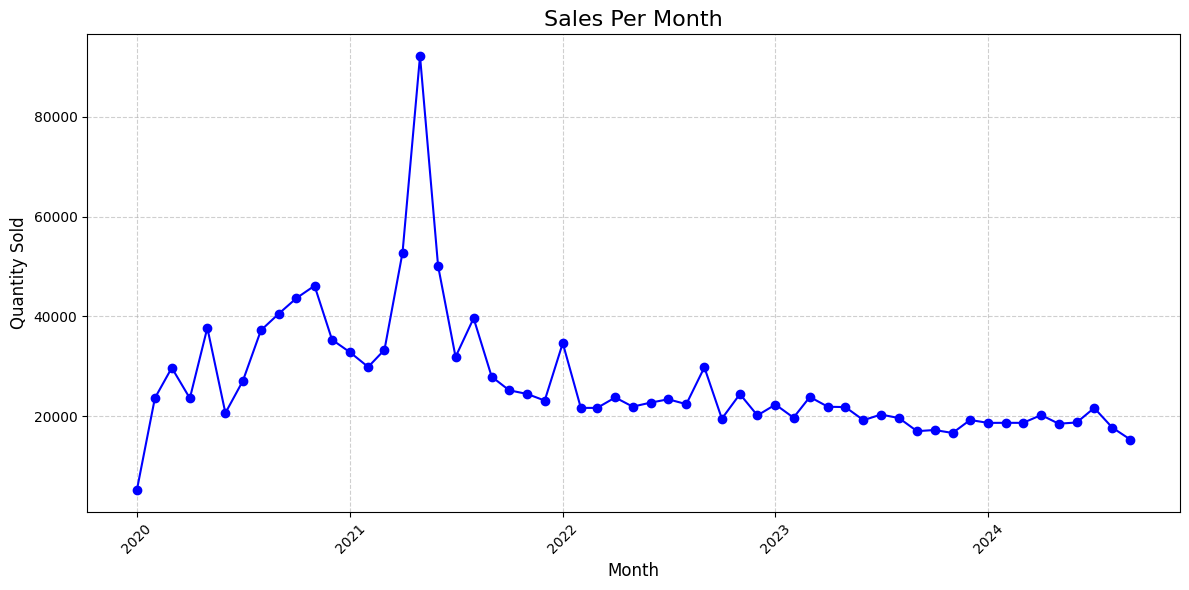

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined data
final_sales_data = pd.read_csv('combined_sales_data.csv')

# Convert 'purchased_date_time' to datetime format
final_sales_data['purchased_date_time'] = pd.to_datetime(final_sales_data['purchased_date_time'])

# Extract year and month for grouping
final_sales_data['year_month'] = final_sales_data['purchased_date_time'].dt.to_period('M')

# Group by year and month, summing up the quantity
sales_per_month = final_sales_data.groupby('year_month')['quantity'].sum().reset_index()

# Convert the 'year_month' column back to datetime for plotting
sales_per_month['year_month'] = sales_per_month['year_month'].astype(str)
sales_per_month['year_month'] = pd.to_datetime(sales_per_month['year_month'])

# Plot sales per month
plt.figure(figsize=(12, 6))
plt.plot(sales_per_month['year_month'], sales_per_month['quantity'], marker='o', linestyle='-', color='b')
plt.title('Sales Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\kshet\AppData\Local\Temp\ipykernel_2400\790820210.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


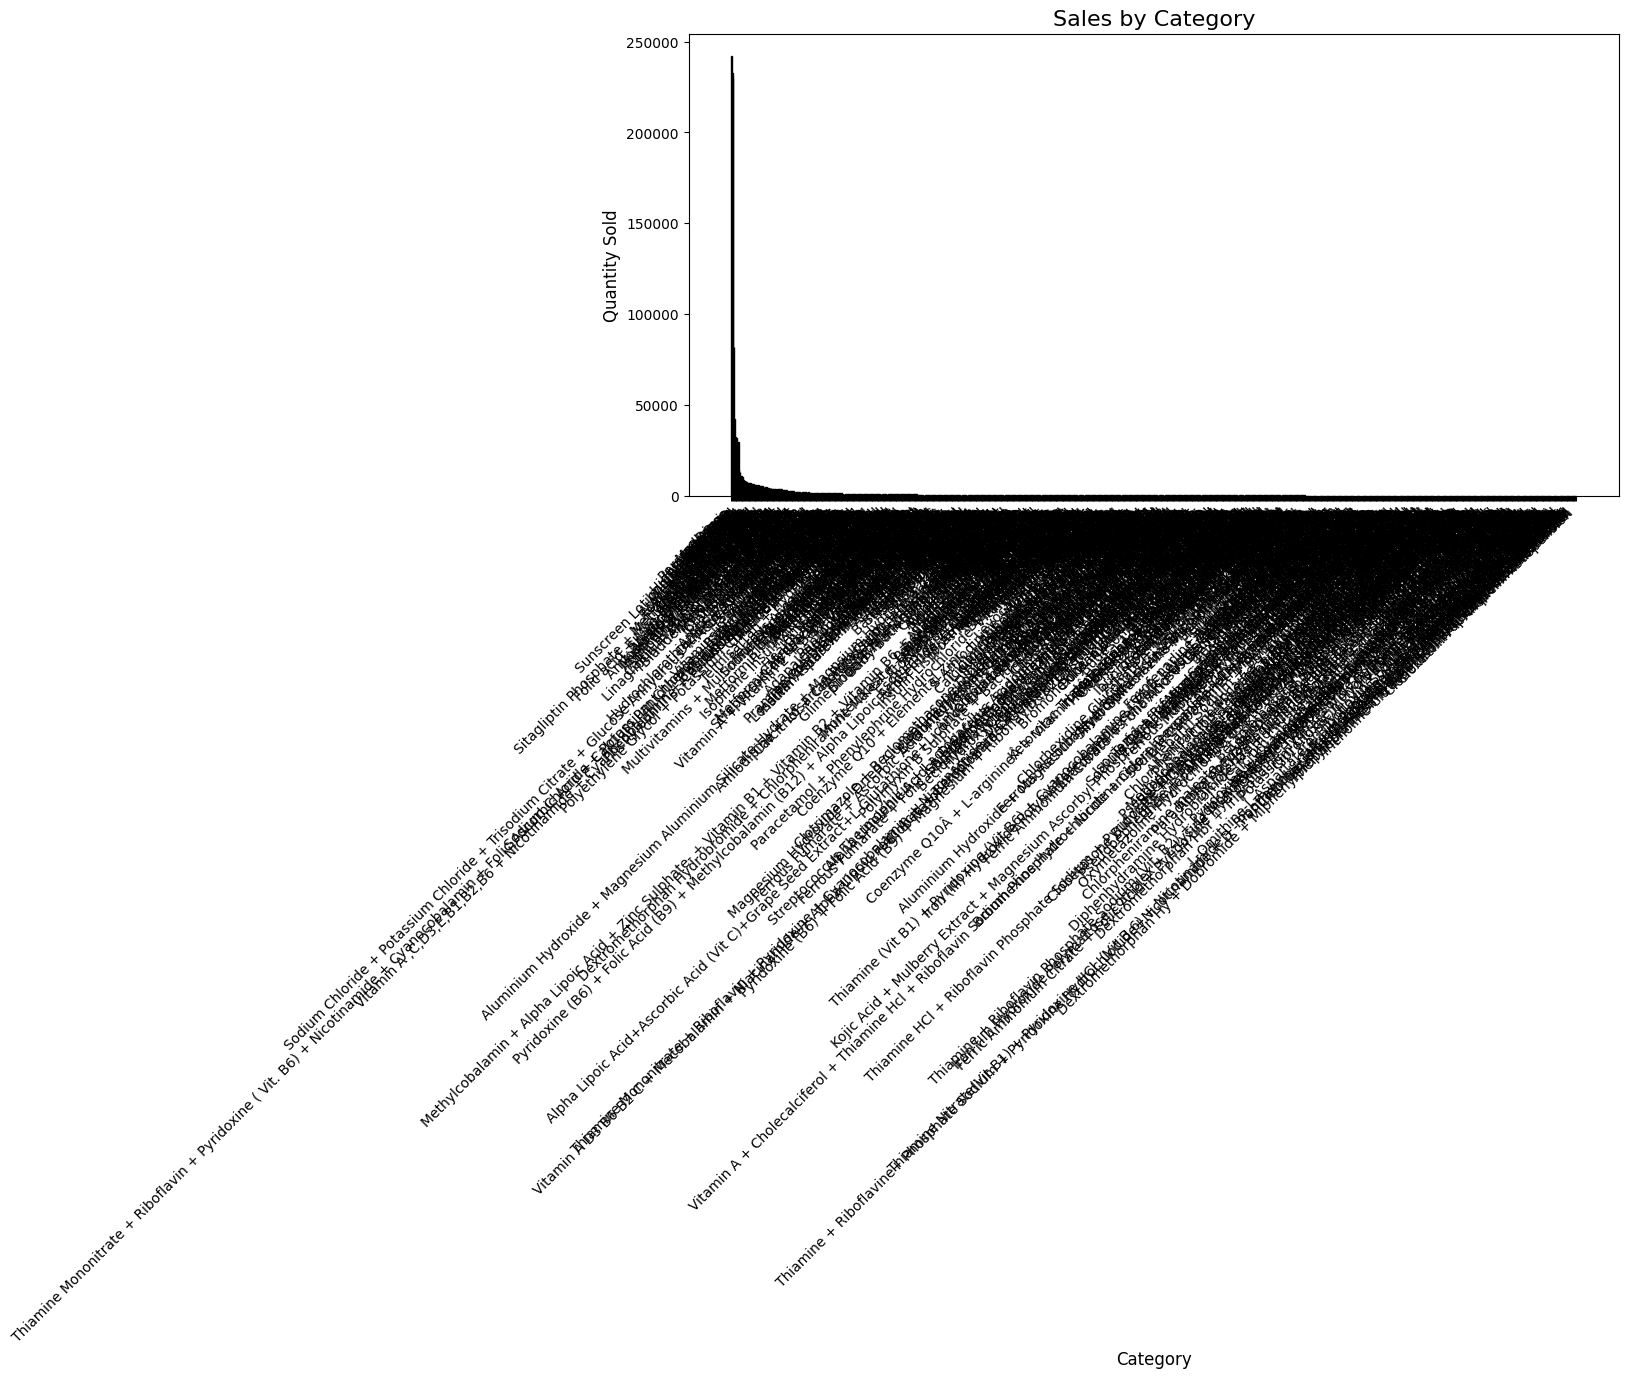

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined data
final_sales_data = pd.read_csv('combined_sales_data.csv')

# Group by category and sum the quantity
sales_by_category = final_sales_data.groupby('category')['quantity'].sum().reset_index()

# Sort categories by total sales in descending order
sales_by_category = sales_by_category.sort_values(by='quantity', ascending=False)

# Plot sales by category as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sales_by_category['category'], sales_by_category['quantity'], color='skyblue', edgecolor='black')
plt.title('Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Load the combined data
final_sales_data = pd.read_csv('combined_sales_data.csv')

# Group by category and sum the quantity
sales_by_category = final_sales_data.groupby('category')['quantity'].sum().reset_index()

# Loop through each category to display its sales data
for index, row in sales_by_category.iterrows():
    category_name = row['category']
    total_sales = row['quantity']
    print(f"Category: {category_name}, Total Sales: {total_sales}")


Category: Abortion / Uterus Infection, Total Sales: 2
Category: Acarbose, Total Sales: 1591
Category: Accessories, Total Sales: 782
Category: Aceclofenac, Total Sales: 75
Category: Aceclofenac Topical, Total Sales: 38
Category: Acetaminophen + Caffeine, Total Sales: 2
Category: Acetaminophen + Tramadol Hydrochloride, Total Sales: 1
Category: Acetazolamide, Total Sales: 23
Category: Acetylcysteine, Total Sales: 239
Category: Acetylcysteine + Taurine, Total Sales: 551
Category: Acetylsalicyclic Acid, Total Sales: 141
Category: Aciclovir, Total Sales: 115
Category: Aciclovir Topical, Total Sales: 48
Category: Acne, Total Sales: 7772
Category: Adapalene, Total Sales: 124
Category: Adapalene + Benzoyl Peroxide, Total Sales: 175
Category: Adapalene + Clindamycin Phosphate, Total Sales: 416
Category: Adult Diapers and Pads, Total Sales: 342
Category: Albendazole, Total Sales: 165
Category: Albendazole Suspension, Total Sales: 57
Category: Alendronate, Total Sales: 135
Category: Alfacalcidol +

In [12]:
# Group by category and aggregate product IDs and names
categories_with_products = final_sales_data.groupby('category').apply(
    lambda x: x[['product_id', 'product_name']].drop_duplicates().to_dict(orient='records')
).reset_index()

# Rename the columns for better readability
categories_with_products.columns = ['Category', 'Products']

# Display the result
for index, row in categories_with_products.iterrows():
    print(f"Category: {row['Category']}")
    for product in row['Products']:
        print(f"  - Product ID: {product['product_id']}, Product Name: {product['product_name']}")
    print()


Category: Abortion / Uterus Infection
  - Product ID: 5e01ed45462912000132152e, Product Name: Medabon Tablet 5'S

Category: Acarbose
  - Product ID: 5e0ed3403546290001b871d4, Product Name: Glubose-50 Tablet 10'S
  - Product ID: 5e1813ff606d980001b0ba9e, Product Name: Glucar 50 Tablet 10'S
  - Product ID: 5e678b136e59f3000143a217, Product Name: Arbo 50 Tablet 10'S
  - Product ID: 5e71d4a2f2dcec000196d0d2, Product Name: Acar 25 Tablet 10'S
  - Product ID: 5ec63f9fea3b060001abbff7, Product Name: Acar 50 Tablet 10'S
  - Product ID: 5df99c4f5133bb0001bd7492, Product Name: Arbo 25 Tablet 10'S
  - Product ID: 5e059ffdd37ee900014197bb, Product Name: Acbose 50 Tablet 15'S
  - Product ID: 5e0ed3403546290001b871bc, Product Name: Glubose-25 Tablet 10'S
  - Product ID: 65fc122ee70f3cd9e5955776, Product Name: Glucobay 50mg Tablet 10'S

Category: Accessories
  - Product ID: 5e0328ed462912000133236e, Product Name: Chicco Baby Nail Scissors Pink
  - Product ID: 5e0328ed4629120001332360, Product Name: C

C:\Users\kshet\AppData\Local\Temp\ipykernel_2400\3102690867.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  categories_with_products = final_sales_data.groupby('category').apply(


In [13]:
import pandas as pd

# Load the combined data
final_sales_data = pd.read_csv('combined_sales_data.csv')

# Group by customer_id and count the number of purchases
customer_purchase_counts = final_sales_data.groupby('customer_id')['_id'].count().reset_index()

# Rename columns for clarity
customer_purchase_counts.columns = ['customer_id', 'purchase_count']

# Filter customers with more than one purchase
repeat_customers = customer_purchase_counts[customer_purchase_counts['purchase_count'] > 1]

# Merge with the original data to get full customer details if needed
repeat_customers_details = pd.merge(repeat_customers, final_sales_data, on='customer_id', how='inner')

# Display repeat customers and their purchase count
print(repeat_customers[['customer_id', 'purchase_count']].drop_duplicates())

# Optional: Save the result
repeat_customers[['customer_id', 'purchase_count']].drop_duplicates().to_csv('repeat_customers.csv', index=False)


KeyError: 'Column not found: _id'

In [14]:
import pandas as pd

# Load the combined data
combined_sales_data = pd.read_csv('combined_sales_data.csv')

# Print the first 5 rows of all columns
print(combined_sales_data.head())

                      _id_x               customer_id  \
0  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
1  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
2  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
3  5e1067a612124100012b3c80  5e103fea121241000126d997   
4  5e1067a612124100012b3c80  5e103fea121241000126d997   

                 product_id  quantity       purchased_date_time  \
0  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
1  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
2  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
3  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   
4  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   

                      _id_y         dob gender  \
0  5e1024dd1212410001218ff2         NaN    NaN   
1  5e1024dd1212410001218ff2         NaN    NaN   
2  5e1024dd1212410001218ff2         NaN    NaN   
3  5e103fea121241000126d997  1988-10-07      M   
4  5

In [15]:
# Rename _id_x to sales_id
final_sales_data = final_sales_data.rename(columns={'_id_x': 'sales_id'})

# Drop the _id_y column
final_sales_data = final_sales_data.drop(columns=['_id_y'])

# Display the updated dataframe
print(final_sales_data.head())

# Optionally save the updated dataframe to a CSV file
final_sales_data.to_csv('updated_combined_sales_data.csv', index=False)


                   sales_id               customer_id  \
0  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
1  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
2  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
3  5e1067a612124100012b3c80  5e103fea121241000126d997   
4  5e1067a612124100012b3c80  5e103fea121241000126d997   

                 product_id  quantity       purchased_date_time         dob  \
0  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z         NaN   
1  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z         NaN   
2  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z         NaN   
3  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z  1988-10-07   
4  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z  1988-10-07   

  gender                                       product_name  \
0    NaN                       2 Piece Double Layer Hot Bag   
1    NaN                       2 Piece Double Layer Hot 

In [21]:
# Count rows with any null values
num_null_rows = final_sales_data.isnull().any(axis=1).sum()
print(f"Number of rows with null values: {num_null_rows}")


Number of rows with null values: 514581


Uncommon products

In [31]:
def find_uncommon_products_in_dataset(threshold=0.000030):
    """
    Find uncommon products in the dataset based on purchase frequency and include product details.

    Parameters:
        threshold (float): The threshold for rarity (e.g., 0.1 = 10% or fewer customers purchased).

    Returns:
        uncommon_products (pd.DataFrame): DataFrame of uncommon products with their purchase frequencies and details.
    """
    # Calculate the purchase frequency of each product
    product_purchase_count = (customer_product_matrix.iloc[:, 1:] > 0).sum(axis=0)
    total_customers = customer_product_matrix.shape[0]
    product_rarity = product_purchase_count / total_customers

    # Filter products below the rarity threshold
    uncommon_products = product_rarity[product_rarity <= threshold]

    # Create a DataFrame with uncommon products and their frequencies
    uncommon_products_df = uncommon_products.reset_index()
    uncommon_products_df.columns = ['product_id', 'purchase_frequency']

    # Merge with product details from final_sales_data
    product_details = final_sales_data[['product_id', 'product_description', 'product_name', 'category']].drop_duplicates()
    uncommon_products_with_details = uncommon_products_df.merge(product_details, on='product_id', how='left')

    return uncommon_products_with_details

# Example usage:
threshold = 0.1  # Products purchased by 10% or fewer customers are considered uncommon
uncommon_products_df = find_uncommon_products_in_dataset(threshold=threshold)
print("Uncommon products in the dataset with details:")
print(uncommon_products_df)


Uncommon products in the dataset with details:
                     product_id  purchase_frequency  \
0      5d91c2d455544a0001fb6b77            0.004041   
1      5d91c2d455544a0001fb6b77            0.004041   
2      5d91c2d455544a0001fb6b77            0.004041   
3      5d91c2d555544a0001fb6b85            0.002496   
4      5d91c2d555544a0001fb6b85            0.002496   
...                         ...                 ...   
28665                      9029            0.000030   
28666                      9029            0.000030   
28667                      9031            0.000030   
28668                      9031            0.000030   
28669                      9031            0.000030   

                                     product_description  \
0      <ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...   
1      <ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...   
2      <ul>\r\n<li>SKIN PROTECTANT MOISTURIZER â€“Mam...   
3      <ul>\r\n<li>Cocoa and shea butter in our suns